In [17]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import scipy.stats as stats
from matplotlib import gridspec
import aplpy as apl #The Astronomy Plotting Library for python
import astropy
from astropy.stats import sigma_clip
from astropy.modeling import functional_models, models, fitting
import astropy.units as U
from astropy.coordinates import ICRS, Galactic, FK4, FK5, Angle, Latitude, Longitude
import astropy.constants as C
from astropy import wcs
import astropy.io.fits as fits
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.stats import signal_to_noise_oir_ccd as SNRas
#import spectral_cube as SC
#from spectral_cube import SpectralCube as sc
from astropy.wcs import WCS
matplotlib.use('Agg')
import matplotlib.cm as cm
#import astrometry as ast
import pyfits
import requests
import json
import os
from sklearn import datasets, linear_model
from scipy.optimize import curve_fit
import numpy.ma as ma
from astropy.table import Table, Column
import pyextract
import sewpy
import pandas as pd
#import alipy

In [18]:
quasH = os.listdir('/../home/lynge/MasterP/NGC3783/NGC3783g/')
quasH = [os.path.join('/../home/lynge/MasterP/NGC3783/NGC3783g/',f) \
        for f in os.listdir('/../home/lynge/MasterP/NGC3783/NGC3783g/')]

#flat = [os.path.join('/../home/lynge/MasterP/Flats/Flatsr/',f) \
#        for f in os.listdir('/../home/lynge/MasterP/Flats/Flatsr/')]

#flat_date = np.load('r-flat_date.npy')
#flat_plate = np.load('r-flat_plate.npy')

#print flat
#print pyfits.getheader(quasH[0])

qua1_RA_WORLD = 174.75717083
qua1_DEC_WORLD = -37.73850000
sta1_RA_WORLD = 174.77413750 - 9*10**(-5) #HD 101274
sta1_DEC_WORLD = -37.75375000 + 6.4*10**(-5)
sta2_RA_WORLD = 174.82283333 - 0.15/3600. #Tycho-2 7740-22-1
sta2_DEC_WORLD = -37.76239167
sta3_RA_WORLD = 174.79553333 #174.79553250 #Tycho-2 7740-529-1
sta3_DEC_WORLD = -37.83470278 #-37.83470333
gal_RA_WORLD = 174.69151250 + 0.6/3600.# Galaxy
gal_DEC_WORLD = -37.71181944 + 0.4/3600


nsta1_RA_WORLD = 174.78085417
nsta1_DEC_WORLD = -37.72087222

nsta2_RA_WORLD = 174.80970000
nsta2_DEC_WORLD = -37.70315556

nsta3_RA_WORLD = 174.81946667
nsta3_DEC_WORLD = -37.70895000

nsta4_RA_WORLD = 174.78542917
nsta4_DEC_WORLD = -37.68869722

nsta5_RA_WORLD = 174.77695000
nsta5_DEC_WORLD = -37.69085833

sky_RA_WORLD = 174.75445032458904 #Random patch of sky
sky_DEC_WORLD = -37.77465736280882


sky2_RA_WORLD = 174.78004  #Random patch of sky
sky2_DEC_WORLD = -37.705313

MAG_HD101274_B = 9.23
MAG_HD101274_V = 9.12
MAG_HD101274_G = 9.192
MAG_HD101274_J = float('nan')
MAG_HD101274_H = float('nan')
MAG_HD101274_K = float('nan')

MAG_HD101274_g = 9.1124
MAG_HD101274_r = 9.5110
MAG_HD101274_i = float('nan')
MAG_HD101274_z = 10.3072

MAG_TYCHO_2_7740_22_1_B = 12.58
MAG_TYCHO_2_7740_22_1_V = 12.12
MAG_TYCHO_2_7740_22_1_G = 11.78
MAG_TYCHO_2_7740_22_1_J = 10.919
MAG_TYCHO_2_7740_22_1_H = 10.726
MAG_TYCHO_2_7740_22_1_K = 10.611

MAG_TYCHO_2_7740_22_1_g = 11.7892
MAG_TYCHO_2_7740_22_1_r = 11.6444
MAG_TYCHO_2_7740_22_1_i = float('nan')
MAG_TYCHO_2_7740_22_1_z = 11.5203

MAG_TYCHO_2_7740_529_1_B = 11.61
MAG_TYCHO_2_7740_529_1_V = 10.94
MAG_TYCHO_2_7740_529_1_G = 10.867
MAG_TYCHO_2_7740_529_1_J = 9.902
MAG_TYCHO_2_7740_529_1_H = 9.625
MAG_TYCHO_2_7740_529_1_K = 9.580

MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)


FLUX_V_VEGA_B = 4.063*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_V = 3.636*10**(-20)
FLUX_V_VEGA_G = float('nan')
FLUX_V_VEGA_J = 1.589*10**(-20)
FLUX_V_VEGA_H = 1.021*10**(-20)
FLUX_V_VEGA_K = 0.64*10**(-20)

FLUX_V_VEGA_g = 3.631*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_r = 3.631*10**(-20)
FLUX_V_VEGA_i = 3.631*10**(-20)
FLUX_V_VEGA_z = 3.631*10**(-20)


flat_date = []
flat_plate = []

for i in range(len(flat)):
    header1 = pyfits.getheader(flat[i])
    if int(header1['MJD-OBS']) not in flat_date:
        flat_date.append(int(header1['MJD-OBS']))
        plate = np.zeros((1024,1024))
        for j in range(len(flat)):
            header2 = pyfits.getheader(flat[j])
            if int(header2['MJD-OBS']) == int(header1['MJD-OBS']):
                plate = plate + pyfits.getdata(flat[j])
        plate = plate/np.mean(plate)
        flat_plate.append(plate)

flat_date = np.array(flat_date)
flat_plate = np.array(flat_plate)

flat_array = np.array((flat_date,flat_plate))



np.save('r-flat_date',flat_date)
np.save('r-flat_plate',flat_plate)

In [19]:
def dist(mid,end):
    return np.sqrt((mid[0] - end[0])**2 + (mid[1] - end[1])**2)

In [20]:
def flux_cal(A_mag,B_mag,B_flux):
    '''Flux of A found through magnitude and flux of B'''
    return B_flux*10**((B_mag-A_mag)/2.5)

In [21]:
def Basic(quasar,header):
    '''Provides a basic list of neccesities from the fits header file for use in the later \
    flux determination, it does not serve an individual purpose beyound that'''
    AGNdata = quasar #np.rot90(np.rot90(np.fliplr(quasar)))
    #header = data[0].header
    #print header
    RAstd = header['CRVAL1']
    DECstd = header['CRVAL2']
    #print RAstd, DECstd
    pixspa = header['PIXSCALE']/(3600.)
    #print pixspa
    RAstdpix = header['CRPIX1']
    DECstdpix = header['CRPIX2']
    exptime = 10 # header['EXPTIME']
    return header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime

In [22]:
def flat_solve(image,header,f_date,f_plate):
    day = float('nan')
    for i in range(len(f_date)):
        if f_date[i] == int(header['MJD-OBS']):
            day = i
    image1 = image/f_plate[day]
    image1[f_plate == 0] = 0
    return image1

In [23]:
def curve(quasar,header,w,center,apparature):
    '''Determines the FLUX of the stellar object given the the numpy array of the image, \
    the header of the fits file, the astropy coordinate representation, \
    the object position and the apparature of interest'''
    header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime = Basic(quasar,header)
    #AGNdata = np.swapaxes(AGNdata,0,1)
    y, x = np.ogrid[0:header['NAXIS1'],0:header['NAXIS1']]
    #w = np.swapaxes(w,0,1)
    #F_AGN = np.zeros((512,512,3)) #((int(2*apparature/pixspa)+1,int(2*apparature/pixspa)+1,3))
    #print center
    x1 = w.all_world2pix(center[0],center[1],0)
    x1,y1 = (x1[0]),(x1[1])
    try:
        #AGNdata = flat_solve(AGNdata,header,flat_date,flat_plate)
        mask = ((y-y1)**2 + (x-x1)**2) > (apparature/float(pixspa))**2
        AGNdata[mask] = float(0)
        mask = AGNdata == 0.
        rows = np.flatnonzero((~mask).sum(axis=1))
        cols = np.flatnonzero((~mask).sum(axis=0))
        AGNdata = AGNdata[rows.min():rows.max()+1, cols.min():cols.max()+1]
        #print apparature/float(pixspa)
    except:
        AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    #if np.sum(AGNdata) < 500:
    #    AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    return AGNdata, x1, y1


In [24]:
def comp1(qua,sta):
    '''Code to determine the relation between the AGN and the Stellar flux as determined by either me \
    or by the SExtractor program respectively'''
    comp = qua/sta
    return comp

In [25]:
def SXtable(quas,aperture,s):
    header = pyfits.getheader(quas[s])
    phot_app = aperture*3600/header['PIXSCALE']
    np.set_printoptions(threshold=np.inf)
    sew = sewpy.SEW(params=['XMODEL_WORLD', 'YMODEL_WORLD', 'X2MODEL_WORLD', 'Y2MODEL_WORLD', 
                            'XMODEL_IMAGE', 'YMODEL_IMAGE', 'FLUX_RADIUS(1)', 'FLUX_APER','ELLIPTICITY'],
                    config={"DETECT_THRESH":5, 'DETECT_MINAREA':5, 'DETECT_MAXAREA':100, 
                            "PHOT_FLUXFRAC":"0.5", 'PHOT_APERTURES':2*phot_app, 
                            'PIXEL_SCALE':header['PIXSCALE']}
                    , sexpath='/usr/bin/sextractor')
    out = sew(quas[s])
    return out

In [26]:
def SXtable2(star,aperture,header):
    phot_app = aperture*3600/header['PIXSCALE']
    np.set_printoptions(threshold=np.inf)
    sew = sewpy.SEW(params=['XMODEL_WORLD', 'YMODEL_WORLD', 'X2MODEL_WORLD', 'Y2MODEL_WORLD', 
                            'XMODEL_IMAGE', 'YMODEL_IMAGE', 'FLUX_RADIUS(1)', 'FLUX_APER','ELLIPTICITY'],
                    config={"DETECT_THRESH":5, 'DETECT_MINAREA':5, 'DETECT_MAXAREA':100, 
                            "PHOT_FLUXFRAC":"0.5", 'PHOT_APERTURES':2*phot_app, 
                            'PIXEL_SCALE':header['PIXSCALE']}
                    , sexpath='/usr/bin/sextractor')
    out = sew(star)
    return out

In [27]:
def flux(quas,aperture,main_RA_WORLD,main_DEC_WORLD):
    output = np.zeros(((len(quas))),dtype=np.dtype([('flux_main',float),('time',float),('err',float),\
                                                    ('err_bar',float), ('posx',float),('posy',float),\
                                                    ('posx_err',float),('posy_err',float),\
                                                    ('Ellipticity',float)]))
    headerlist = []
    for i in range(len(quas)):
        out = SXtable(quas,aperture,i)
        RAmain = WCS(quas[i]).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[0]
        DECmain = WCS(quas[i]).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[1]
        #RAsec = WCS(quas[i]).all_world2pix(sec_RA_WORLD,sec_DEC_WORLD,1)[0]
        #DECsec = WCS(quas[i]).all_world2pix(sec_RA_WORLD,sec_DEC_WORLD,1)[1]
        header = pyfits.getheader(quas[i])
        #mask = (out['table']['XMODEL_IMAGE'] < RAmain - 2) & (out['table']['XMODEL_IMAGE'] > RAmain + 2)
        output['flux_main'][i] = np.nan
        output['time'][i] = header['MJD-OBS']
        output['err'][i] = np.nan
        output['err_bar'][i] = np.nan
        output['posx'][i] = np.nan
        output['posx_err'][i] = np.nan
        output['posy'][i] = np.nan
        output['posy_err'][i] = np.nan
        output['Ellipticity'][i] = np.nan
        headerlist.append(header)
        for j in range(len(out['table']['XMODEL_IMAGE'])):
            #output['time'][i] = header['MJD-OBS']
            if RAmain - 1. < out['table']['XMODEL_IMAGE'][j] <  RAmain + 1. and \
            DECmain - 1. < out['table']['YMODEL_IMAGE'][j] < DECmain + 1.:
                output['flux_main'][i] = out['table']['FLUX_APER'][j]
                output['err'][i] = 3600*np.sqrt((out['table']['XMODEL_WORLD'][j] - main_RA_WORLD)**2 \
                                        + (out['table']['YMODEL_WORLD'][j] - main_DEC_WORLD)**2)
                output['err_bar'][i] = np.sqrt(out['table']['X2MODEL_WORLD'][j]**2 \
                                       + out['table']['Y2MODEL_WORLD'][j]**2)
                output['posx'][i] = out['table']['XMODEL_WORLD'][j]
                output['posx_err'][i] = out['table']['X2MODEL_WORLD'][j]
                output['posy'][i] = out['table']['YMODEL_WORLD'][j]
                output['posy_err'][i] = out['table']['Y2MODEL_WORLD'][j]
                output['Ellipticity'][i] = out['table']['ELLIPTICITY'][j]
    print 'Done'
    return output, headerlist


In [28]:
def SNR(data1,data2,header,ap1,ap2):
    npix1 = np.count_nonzero(data1)
    npix2 = np.count_nonzero(data2)
    data1_2 = np.sum(data1)
    data2_2 = np.sum(data2)
    #-------------------------------------------------------------------------------------------
    return SNRas(header['EXPTIME'],data1_2,data2_2,header['DRKNOISE'],header['RONOISE'],npix1,gain=header['GAIN'])
#data1_2*header['EXPTIME']/np.sqrt(data1_2*header['EXPTIME'] + data2_2*header['EXPTIME'] + 
#                                             header['DRKNOISE']*npix1*header['EXPTIME'] + 
#                                             (header['RONOISE']/float(header['GAIN']))**2*npix1)
#SNRas(header['EXPTIME'],data1_2,data2_2,0,header['RONOISE'],npix1,gain=header['GAIN'])
#(data1_2*header['DIT'])/(np.sqrt(data1_2*header['DIT']
#                                                + npix1*data2_2*header['DIT']
#                                                + (1*npix1*header['RON']/float(header['GAIN']))**2))
#SNRas(header['DIT'],data1_2,abs(data2_2),0,header['RON'],npix1,gain=header['GAIN'])

In [29]:
for i in range(len(quasH)):
    data, header = fits.getdata(quasH[i],header=True) #RA---TAN
    #print header['CTYPE2']
    header['CTYPE1'] = "RA---TAN -SIP"
    header['CTYPE2'] = "DEC--TAN -SIP"
    '''header['A_ORDER'] = "0"
    header['B_ORDER'] = "0"
    header['AP_ORDER'] = "0"
    header['BP_ORDER'] = "0"
    header['A_0_2'] = "0"
    header['A_1_1'] = "0"
    header['A_2_0'] = "0"
    header['B_0_2'] = "0"
    header['B_1_1'] = "0"
    header['B_2_0'] = "0"
    header['AP_0_2'] = "0"
    header['AP_1_1'] = "0"
    header['AP_2_0'] = "0"
    header['AP_0_1'] = "0"
    header['AP_1_0'] = "0"
    header['BP_0_1'] = "0"
    header['BP_0_2'] = "0"
    header['BP_1_0'] = "0"
    header['BP_1_1'] = "0"
    header['BP_2_0'] = "0"'''
    fits.writeto(quasH[i],data,header,clobber=True)
    #print fits.getheader(quasH[i])['A_ORDER']

In [30]:
def AGNflux(quas,aperture1):
    aperture2 = aperture1 + 0.001
    date = []
    flucompsta1 = []
    flucompsta2 = []
    flucompsta3 = []
    flucompsta4 = []
    flucompsta5 = []
    flucompsta6 = []
    flucompsta7 = []
    SNR1 = []
    SNR2 = []
    SNR3 = []
    SNR4 = []
    SNR5 = []
    poissonAGN = []
    poisson529 = []
    poisson22 = []
    poissonHD = []
    ABS_FLUX_LAMBDA_1 = 0
    ABS_FLUX_LAMBDA_2 = 0
    ABS_FLUX_LAMBDA_3 = 0
    ABS_FLUX_V_1 = 0
    ABS_FLUX_V_2 = 0
    ABS_FLUX_V_3 = 0
    SNR_comp = []
    comp_array = np.zeros((len(quas),7))
    SNR_array = np.zeros((len(quas),8))
    #-----------------------------------------------------------------------------------------------
    for i in range(len(quas)):
        print 'Frame nr. ', i
        header = pyfits.getheader(quas[i])
        a_AGN = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (qua1_RA_WORLD,qua1_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a2 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta1_RA_WORLD,sta1_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a3 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta2_RA_WORLD,sta2_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a4 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta3_RA_WORLD,sta3_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a5 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (nsta3_RA_WORLD,nsta3_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a6 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (nsta4_RA_WORLD,nsta4_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a7 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (nsta5_RA_WORLD,nsta5_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a_sky = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky_RA_WORLD,sky_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        #-------------------------------------------------------------------------------------------
        #plt.figure(figsize=(3,3))
        #plt.imshow(a2)
        #plt.show()
        #-------------------------------------------------------------------------------------------
        a_AGN_pix = np.count_nonzero(a_AGN)
        a2_pix = np.count_nonzero(a2)
        a3_pix = np.count_nonzero(a3)
        a4_pix = np.count_nonzero(a4)
        a5_pix = np.count_nonzero(a5)
        a6_pix = np.count_nonzero(a6)
        a7_pix = np.count_nonzero(a7)
        a_sky_pix = np.count_nonzero(a_sky)
        a_sky_2 = np.sum(a_sky)/float(np.count_nonzero(a_sky))
        #a_AGN_2 = (np.sum(a_AGN_1) - np.sum(a_AGN))/(float(np.count_nonzero(a_AGN_1)) - float(np.count_nonzero(a_AGN)))
        #a2_2 = (np.sum(a2_1) - np.sum(a2))/(float(np.count_nonzero(a2_1)) - float(np.count_nonzero(a2)))
        #a3_2 = (np.sum(a3_1) - np.sum(a3))/(float(np.count_nonzero(a3_1)) - float(np.count_nonzero(a3)))
        #a4_2 = (np.sum(a4_1) - np.sum(a4))/(float(np.count_nonzero(a4_1)) - float(np.count_nonzero(a4)))
        a_AGN_3 = np.sum(a_AGN)/float(np.count_nonzero(a_AGN)) - a_sky_2 #Background subtracted flux/pixel/sec
        a2_3 = np.sum(a2)/float(np.count_nonzero(a2)) - a_sky_2
        a3_3 = np.sum(a3)/float(np.count_nonzero(a3)) - a_sky_2
        a4_3 = np.sum(a4)/float(np.count_nonzero(a4)) - a_sky_2
        a5_3 = np.sum(a5)/float(np.count_nonzero(a5)) - a_sky_2
        a6_3 = np.sum(a6)/float(np.count_nonzero(a6)) - a_sky_2
        a7_3 = np.sum(a7)/float(np.count_nonzero(a7)) - a_sky_2
        #-------------------------------------------------------------------------------------------
        date.append(header['MJD-OBS'])
        #-------------------------------------------------------------------------------------------
        SNR1.append(SNR(a_AGN,a_sky,header,aperture1,aperture1))
        SNR2.append(SNR(a2,a_sky,header,aperture1,aperture1))
        SNR3.append(SNR(a3,a_sky,header,aperture1,aperture1))
        SNR4.append(SNR(a4,a_sky,header,aperture1,aperture1))
        poissonAGN.append(np.sqrt(np.sum(a_AGN)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poissonHD.append(np.sqrt(np.sum(a2)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson22.append(np.sqrt(np.sum(a3)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson529.append(np.sqrt(np.sum(a4)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        #-------------------------------------------------------------------------------------------
        #if SNR1[i] < 70:
        #    flucompsta_AGN.append(float('nan'))
        #    flucompsta2.append(float('nan'))
        #    flucompsta3.append(float('nan'))
        #    flucompsta4.append(float('nan'))
        #    flucompsta6.append(float('nan'))
        #    comp_array[i,0] = int(date[i])
        #    comp_array[i,1] = float('nan')
        #    comp_array[i,2] = float('nan')
        #    comp_array[i,3] = float('nan')
        #else:
        flucompsta1.append(comp1(a_AGN_3,a2_3))
        flucompsta2.append(comp1(a_AGN_3,a3_3))
        flucompsta3.append(comp1(a_AGN_3,a4_3))
        flucompsta4.append(comp1(a_AGN_3,a5_3))
        flucompsta5.append(comp1(a_AGN_3,a6_3))
        flucompsta6.append(comp1(a_AGN_3,a7_3))
        comp_array[i,0] = int(date[i])
        comp_array[i,1] = flucompsta1[i]
        comp_array[i,2] = flucompsta2[i]
        comp_array[i,3] = flucompsta3[i]
        comp_array[i,4] = flucompsta4[i]
        comp_array[i,5] = flucompsta5[i]
        comp_array[i,6] = flucompsta6[i]
        SNR_array[i,0] = int(date[i])
        SNR_array[i,1] = SNR(a_AGN,a_sky,header,aperture1,aperture1)
        SNR_array[i,2] = SNR(a2,a_sky,header,aperture1,aperture1)
        SNR_array[i,3] = SNR(a3,a_sky,header,aperture1,aperture1)
        SNR_array[i,4] = SNR(a4,a_sky,header,aperture1,aperture1)
        SNR_array[i,5] = SNR(a5,a_sky,header,aperture1,aperture1)
        SNR_array[i,6] = SNR(a6,a_sky,header,aperture1,aperture1)
        SNR_array[i,7] = SNR(a7,a_sky,header,aperture1,aperture1)
    #-----------------------------------------------------------------------------------------------
    poissonAGN = np.array(poissonAGN)
    poissonHD = np.array(poissonHD)
    poisson22 = np.array(poisson22)
    poisson529 = np.array(poisson529)
    comp_array = comp_array[comp_array[:,0].argsort()]
    #-----------------------------------------------------------------------------------------------
    ABS_FLUX_LAMBDA_1 = np.array(flucompsta1)*flux_cal(MAG_HD101274_z,\
                                                            MAG_VEGA_z,FLUX_LAMBDA_VEGA_z)
    ABS_FLUX_LAMBDA_2 = np.array(flucompsta2)*flux_cal(MAG_TYCHO_2_7740_22_1_z,\
                                                            MAG_VEGA_z,FLUX_LAMBDA_VEGA_z)
    #-----------------------------------------------------------------------------------------------
    ABS_FLUX_V_1 = np.array(flucompsta1)*flux_cal(MAG_HD101274_z,\
                                                            MAG_VEGA_z,FLUX_V_VEGA_z)
    ABS_FLUX_V_2 = np.array(flucompsta2)*flux_cal(MAG_TYCHO_2_7740_22_1_z,\
                                                            MAG_VEGA_z,FLUX_V_VEGA_z)
    #-----------------------------------------------------------------------------------------------
    return comp_array,SNR_array
#np.array(flucompsta_AGN),np.array(flucompsta2),np.array(flucompsta3),np.array(flucompsta4),\
#np.array(flucompsta5),np.array(flucompsta6),np.array(flucompsta7),np.array(SNR1),np.array(SNR2),np.array(SNR3),\
#np.array(SNR4),np.array(SNR5),np.array(SNR_comp),ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,\
#ABS_FLUX_V_1,ABS_FLUX_V_2,ABS_FLUX_V_3,date,poissonAGN,poissonHD,poisson22,poisson529,comp_array

In [31]:
comp_array,SNR_array = AGNflux(quasH,0.003)

Frame nr.  0
Frame nr.  1
Frame nr.  2
Frame nr.  3
Frame nr.  4
Frame nr.  5
Frame nr.  6
Frame nr.  7
Frame nr.  8
Frame nr.  9
Frame nr.  10
Frame nr.  11
Frame nr.  12
Frame nr.  13
Frame nr.  14
Frame nr.  15
Frame nr.  16
Frame nr.  17
Frame nr.  18
Frame nr.  19
Frame nr.  20
Frame nr.  21
Frame nr.  22
Frame nr.  23
Frame nr.  24
Frame nr.  25
Frame nr.  26
Frame nr.  27
Frame nr.  28
Frame nr.  29
Frame nr.  30
Frame nr.  31
Frame nr.  32
Frame nr.  33
Frame nr.  34
Frame nr.  35
Frame nr.  36
Frame nr.  37
Frame nr.  38
Frame nr.  39
Frame nr.  40
Frame nr.  41
Frame nr.  42
Frame nr.  43
Frame nr.  44
Frame nr.  45
Frame nr.  46
Frame nr.  47
Frame nr.  48
Frame nr.  49
Frame nr.  50
Frame nr.  51
Frame nr.  52
Frame nr.  53
Frame nr.  54
Frame nr.  55
Frame nr.  56
Frame nr.  57
Frame nr.  58
Frame nr.  59
Frame nr.  60
Frame nr.  61
Frame nr.  62
Frame nr.  63
Frame nr.  64
Frame nr.  65
Frame nr.  66
Frame nr.  67
Frame nr.  68
Frame nr.  69
Frame nr.  70
Frame nr.  71
Fr

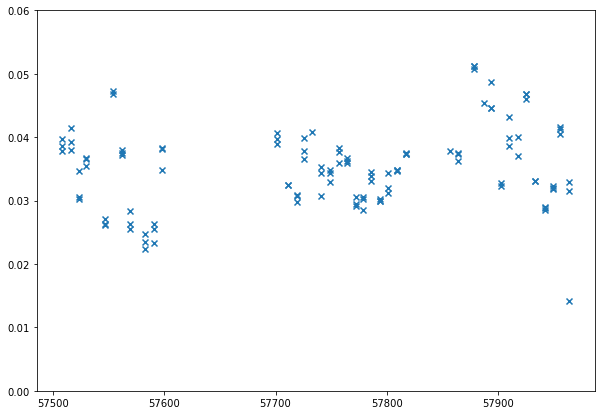

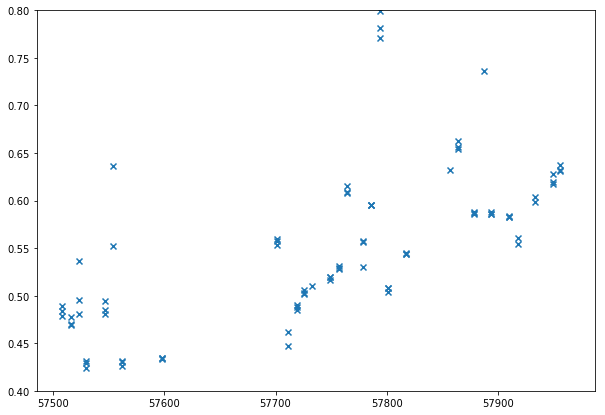

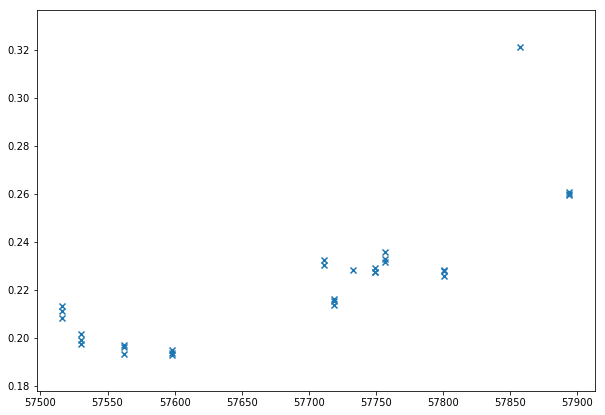

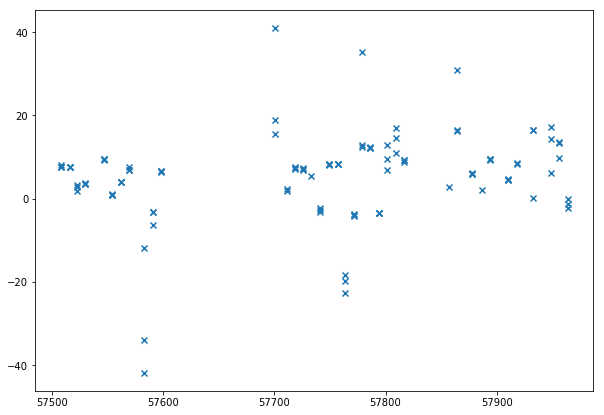

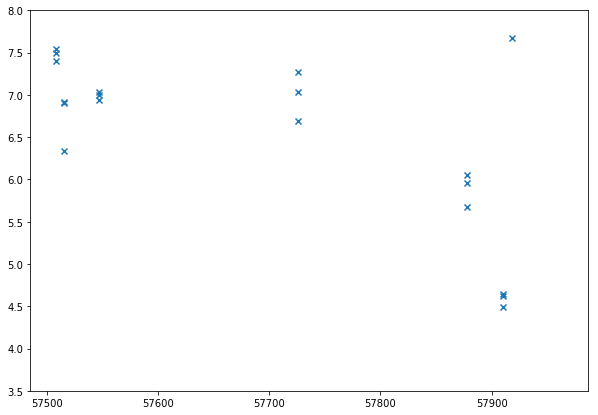

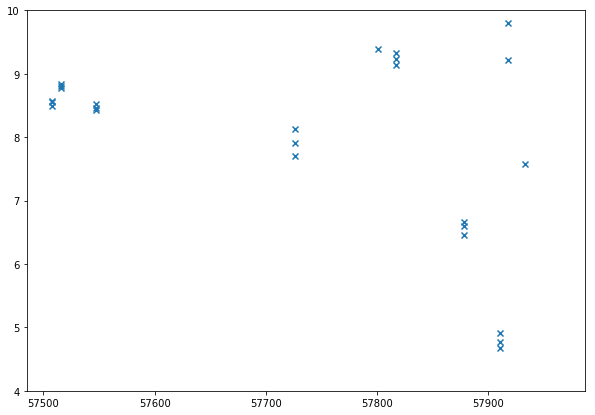

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,1],marker='x')
plt.ylim([0.00,0.06])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,2],marker='x')
plt.ylim([0.4,0.8])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,3],marker='x')
#plt.ylim([3,10])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,4],marker='x')
#plt.ylim([6,12])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,5],marker='x')
plt.ylim([3.5,8])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,6],marker='x')
plt.ylim([4,10])
plt.show()

In [33]:
#print comp_array
comp_array_2 = np.zeros((len(comp_array[:,0]),13))
#comp_array_2[0,0] = comp_array[0,0]
tjek = 0

for i in range(len(comp_array)):
    if comp_array[i,0] != comp_array_2[tjek,0]:
        comp_array_2[tjek,0] = comp_array[i,0]
        com1 = []
        com2 = []
        com3 = []
        com4 = []
        com5 = []
        com6 = []
        com7 = []
        for j in range(len(comp_array)):
            if comp_array_2[tjek,0] == comp_array[j,0]:
                com1.append(comp_array[j,1])
                com2.append(comp_array[j,2])
                com3.append(comp_array[j,3])
                com4.append(comp_array[j,4])
                com5.append(comp_array[j,5])
                com6.append(comp_array[j,6])
        comp_array_2[tjek,1] = np.mean(com1)
        comp_array_2[tjek,2] = np.std(com1)
        comp_array_2[tjek,3] = np.mean(com2)
        comp_array_2[tjek,4] = np.std(com2)
        comp_array_2[tjek,5] = np.mean(com3)
        comp_array_2[tjek,6] = np.std(com3)
        comp_array_2[tjek,7] = np.mean(com4)
        comp_array_2[tjek,8] = np.std(com4)
        comp_array_2[tjek,9] = np.mean(com5)
        comp_array_2[tjek,10] = np.std(com5)
        comp_array_2[tjek,11] = np.mean(com6)
        comp_array_2[tjek,12] = np.std(com6)
        tjek = tjek + 1
#print comp_array_2


18 nan nan nan
57530.0


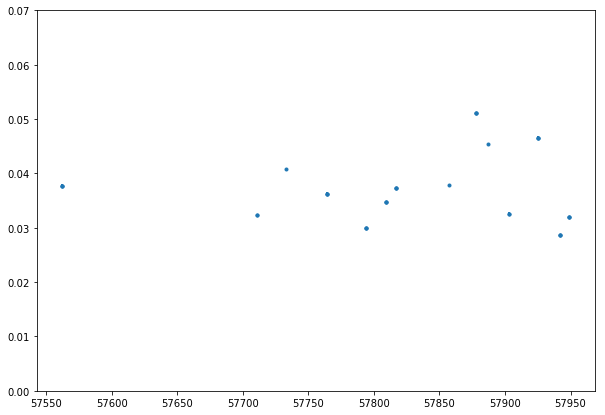

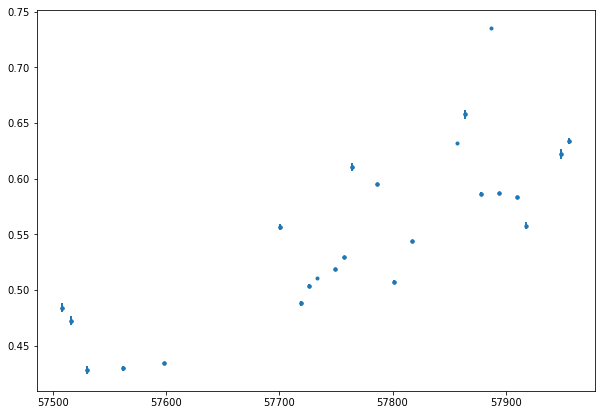

"\nplt.figure(figsize=(10,7))\nplt.errorbar(comp_array_2[:,0],comp_array_2[:,5],yerr=comp_array_2[:,6],fmt='.')\n#plt.ylim([0.02,0.07])\nplt.show()\n\nplt.figure(figsize=(10,7))\nplt.errorbar(comp_array_2[:,0],comp_array_2[:,7],yerr=comp_array_2[:,8],fmt='.')\nplt.ylim([3,8])\nplt.show()\n\nplt.figure(figsize=(10,7))\nplt.errorbar(comp_array_2[:,0],comp_array_2[:,9],yerr=comp_array_2[:,10],fmt='.')\nplt.ylim([3,10])\nplt.show()\n\nplt.figure(figsize=(10,7))\nplt.errorbar(comp_array_2[:,0],comp_array_2[:,11],yerr=comp_array_2[:,12],fmt='.')\nplt.ylim([4,10])\nplt.show()\n"

In [44]:
print np.nanargmax(comp_array_2[0:70,2]), comp_array_2[9,2]/comp_array_2[9,1], comp_array_2[9,2], comp_array_2[9,1]
print comp_array_2[9,0]
plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,1],yerr=comp_array_2[:,2],fmt='.')
plt.ylim([0.0,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,3],yerr=comp_array_2[:,4],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()
'''
plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,5],yerr=comp_array_2[:,6],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,7],yerr=comp_array_2[:,8],fmt='.')
plt.ylim([3,8])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,9],yerr=comp_array_2[:,10],fmt='.')
plt.ylim([3,10])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,11],yerr=comp_array_2[:,12],fmt='.')
plt.ylim([4,10])
plt.show()
'''

In [35]:
#print comp_array
comp_array_2 = np.zeros((len(comp_array[:,0]),13))
#comp_array_2[0,0] = comp_array[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(comp_array)):
    if comp_array[i,0] != comp_array_2[tjek,0]:
        comp_array_2[tjek,0] = comp_array[i,0]
        com1 = []
        com2 = []
        com3 = []
        com4 = []
        com5 = []
        com6 = []
        com7 = []
        for j in range(len(comp_array)):
            if comp_array_2[tjek,0] == comp_array[j,0]:
                com1.append(comp_array[j,1])
                com2.append(comp_array[j,2])
                com3.append(comp_array[j,3])
                com4.append(comp_array[j,4])
                com5.append(comp_array[j,5])
                com6.append(comp_array[j,6])
        comp_array_2[tjek,1] = np.mean(com1)
        comp_array_2[tjek,2] = np.std(com1)
        if comp_array_2[tjek,2]/float(comp_array_2[tjek,1]) > acceptance or float(comp_array_2[tjek,1]) < 0:
            comp_array_2[tjek,1] = float('nan')
            comp_array_2[tjek,2] = float('nan')
        comp_array_2[tjek,3] = np.mean(com2)
        comp_array_2[tjek,4] = np.std(com2)
        if comp_array_2[tjek,4]/float(comp_array_2[tjek,3]) > acceptance or float(comp_array_2[tjek,3]) < 0:
            comp_array_2[tjek,3] = float('nan')
            comp_array_2[tjek,4] = float('nan')
        comp_array_2[tjek,5] = np.mean(com3)
        comp_array_2[tjek,6] = np.std(com3)
        if comp_array_2[tjek,6]/float(comp_array_2[tjek,5]) > acceptance or float(comp_array_2[tjek,5]) < 0:
            comp_array_2[tjek,5] = float('nan')
            comp_array_2[tjek,6] = float('nan')
        comp_array_2[tjek,7] = np.mean(com4)
        comp_array_2[tjek,8] = np.std(com4)
        if comp_array_2[tjek,8]/float(comp_array_2[tjek,7]) > acceptance or float(comp_array_2[tjek,7]) < 0:
            comp_array_2[tjek,7] = float('nan')
            comp_array_2[tjek,8] = float('nan')
        comp_array_2[tjek,9] = np.mean(com5)
        comp_array_2[tjek,10] = np.std(com5)
        if comp_array_2[tjek,10]/float(comp_array_2[tjek,9]) > acceptance or float(comp_array_2[tjek,9]) < 0:
            comp_array_2[tjek,9] = float('nan')
            comp_array_2[tjek,10] = float('nan')
        comp_array_2[tjek,11] = np.mean(com6)
        comp_array_2[tjek,12] = np.std(com6)
        if comp_array_2[tjek,12]/float(comp_array_2[tjek,11]) > acceptance or float(comp_array_2[tjek,11]) < 0:
            comp_array_2[tjek,11] = float('nan')
            comp_array_2[tjek,12] = float('nan')
        tjek = tjek + 1
#print comp_array_2


18 nan nan nan
57530.0


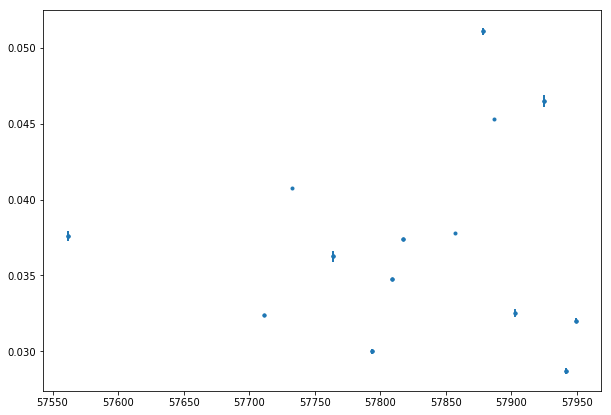

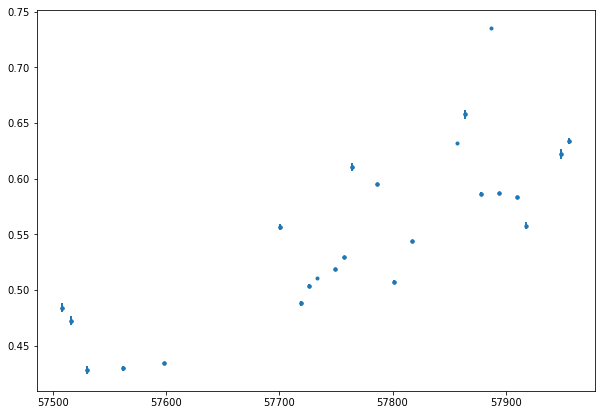

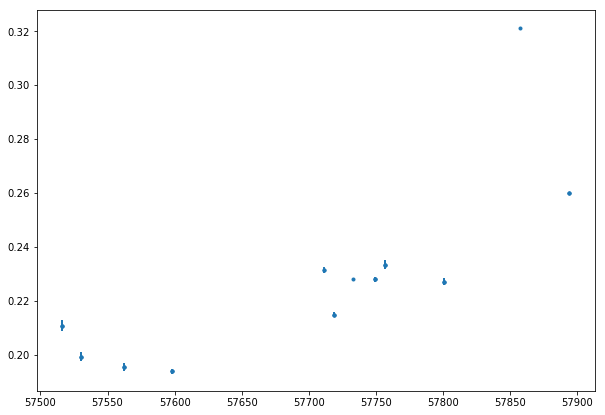

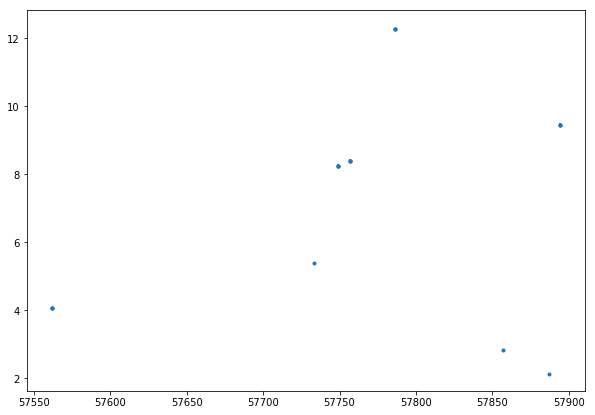

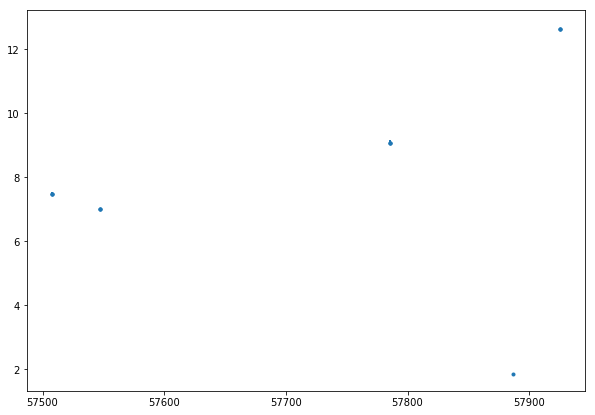

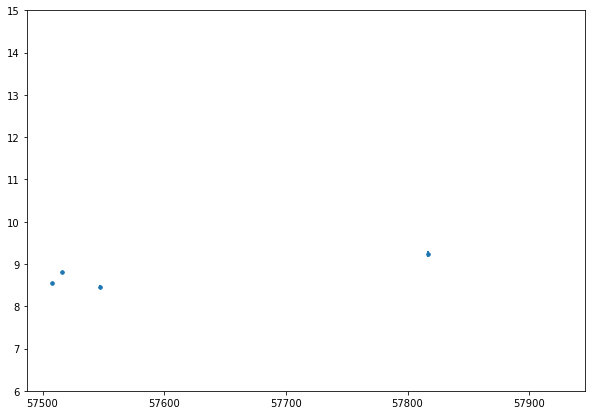

In [36]:
print np.nanargmax(comp_array_2[0:70,2]), comp_array_2[9,2]/comp_array_2[9,1], comp_array_2[9,2], comp_array_2[9,1]
print comp_array_2[9,0]
plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,1],yerr=comp_array_2[:,2],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,3],yerr=comp_array_2[:,4],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,5],yerr=comp_array_2[:,6],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,7],yerr=comp_array_2[:,8],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,9],yerr=comp_array_2[:,10],fmt='.')
#plt.ylim([3,8])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array_2[:,0],comp_array_2[:,11],yerr=comp_array_2[:,12],fmt='.')
plt.ylim([6,15])
plt.show()


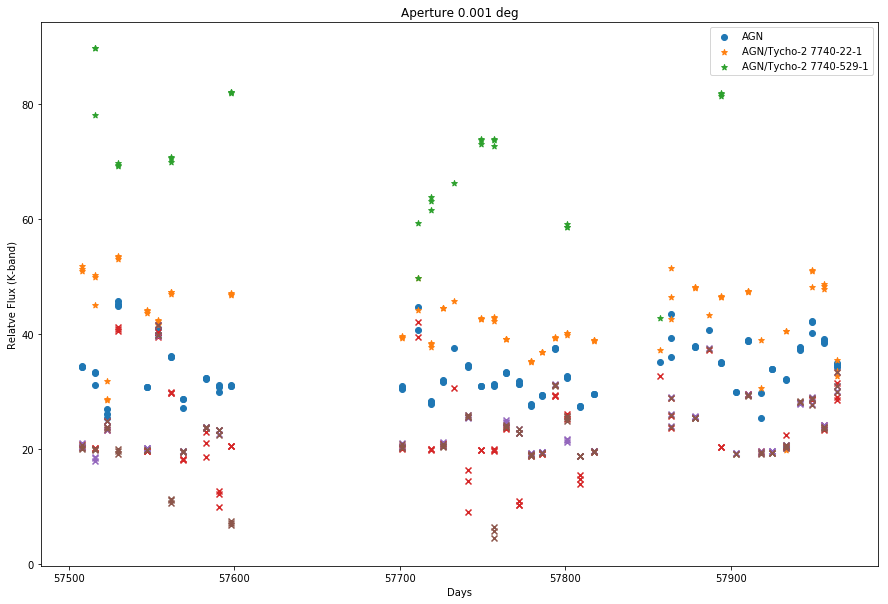

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(SNR_array[:,0],SNR_array[:,1],marker='o',label='AGN')
#plt.scatter(SNR_array[:,0],SNR_array[:,2],marker='.')
plt.scatter(SNR_array[:,0],SNR_array[:,3],marker='*',label='AGN/Tycho-2 7740-22-1')
plt.scatter(SNR_array[:,0],SNR_array[:,4],marker='*',label='AGN/Tycho-2 7740-529-1')
plt.scatter(SNR_array[:,0],SNR_array[:,5],marker='x')
plt.scatter(SNR_array[:,0],SNR_array[:,6],marker='x')
plt.scatter(SNR_array[:,0],SNR_array[:,7],marker='x')
plt.xlabel('Days')
plt.ylabel('Relatve Flux (K-band)')
plt.title('Aperture 0.001 deg')
#plt.ylim([0.1,0.23])
plt.legend()
plt.show()
